<a href="https://colab.research.google.com/github/annethecodegirl/Machine-Learning-for-Econometrics-/blob/main/ML_Project_ENSAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <div style="text-align:center;">
   <span style="color:green; font-size:2em; font-weight:bold;">Exploratory Data Analysis (EDA)</span><br><br>
</div>

# <span style="color:green; text-align:center;">Introduction</span>

In [9]:
import os
print(os.getcwd())

/content


In [18]:
!pip install ucimlrepo
!pip install doubleml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.9/342.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 46.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
from google.colab import files
uploaded = files.upload()

Saving declarations.py to declarations.py


In [13]:
!ls

declarations.py  drive	sample_data


In [14]:
import sys
sys.path.append("/content")

In [19]:
# Import des packages
from importlib import reload
import declarations as d
reload(d)

<module 'declarations' from '/content/declarations.py'>

In [20]:
# Import dataset
df=d.fetch_ucirepo(id=697)
X=df.data.features
y = df.data.targets
df = d.pd.concat([X, y], axis=1)
df.head(3)

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout


In [21]:
# Checking for duplicates
print("Total number of duplicates in features  :",
      X[X.duplicated()].shape[0])

Total number of duplicates in features  : 0


## <span style="color:green; text-align:center;">I- Presentation of database</span>

##### <span style="color:green; text-align:center;">I 1- Presentation of features</span>

In [22]:
# dimensions of features
X.shape

(4424, 36)

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [24]:
categorical_features = ['Marital Status', 'Application mode', 'Application order', 'Debtor',
                        'Course', 'Daytime/evening attendance', 'Previous qualification', 'Gender',
                         'Nacionality', "Mother's qualification", 'Displaced', 'Educational special needs',
                        "Father's qualification", "Mother's occupation", "Father's occupation",
                        'Tuition fees up to date', 'Scholarship holder', 'International']


X[categorical_features] = X[categorical_features].astype('category')


In [ ]:
X.describe()

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,132.613314,126.978119,23.265145,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,13.188332,14.482001,7.587816,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,95.000000,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,125.000000,117.900000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,133.100000,126.100000,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,140.000000,134.800000,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,190.000000,190.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [25]:
X.describe(include="category")

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International
count,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424
unique,6,18,8,17,2,17,21,29,34,32,46,2,2,2,2,2,2,2
top,1,1,1,9500,1,1,1,1,37,9,9,1,0,0,1,0,0,0
freq,3919,1708,3026,766,3941,3717,4314,1069,1209,1577,1010,2426,4373,3921,3896,2868,3325,4314


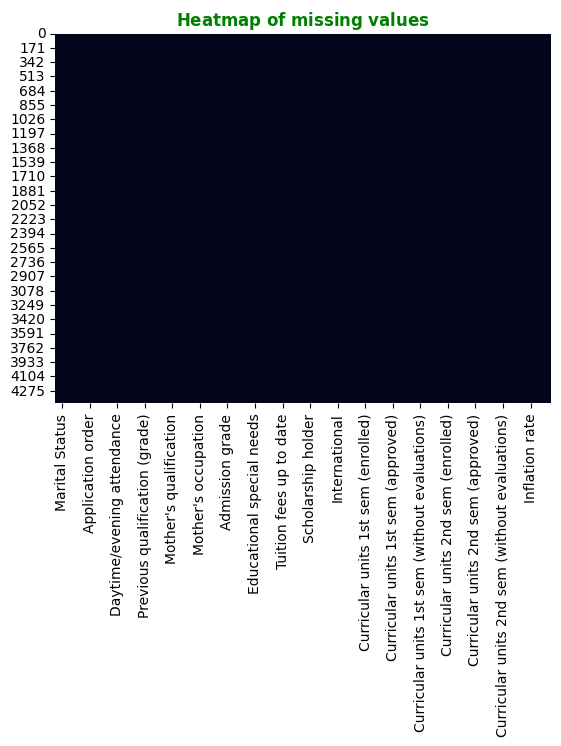

In [26]:
# Plot Missing values
d.missing_plot(X)

##### quelques stat desc

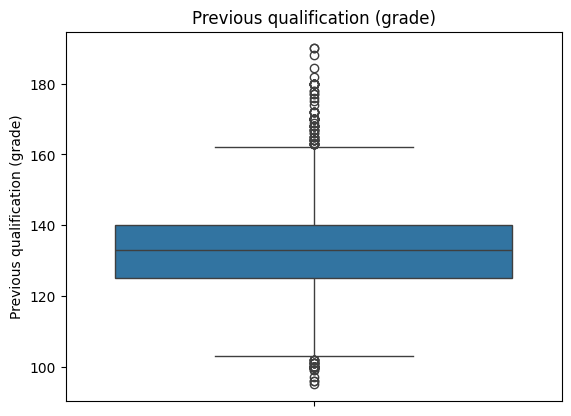

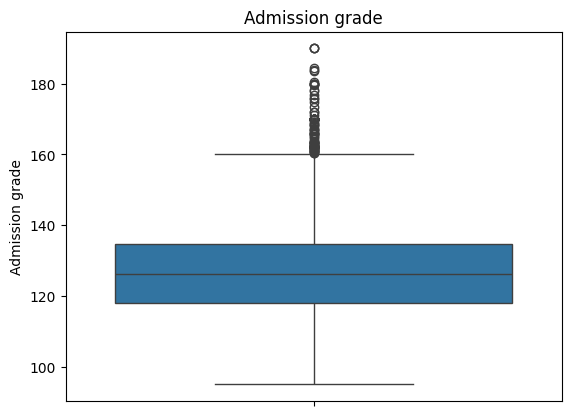

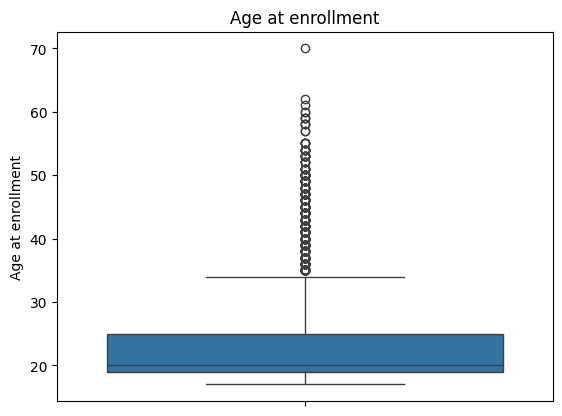

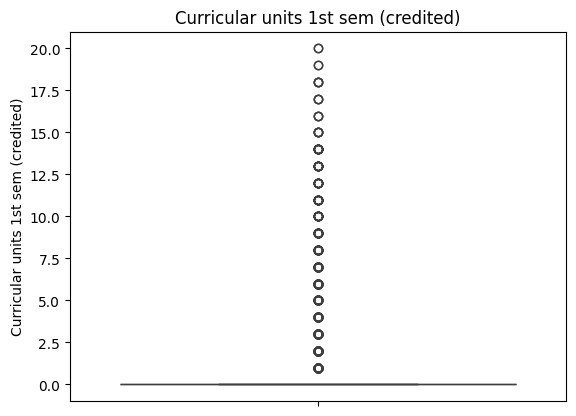

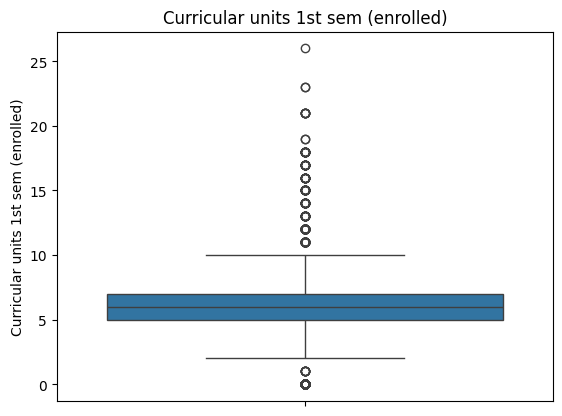

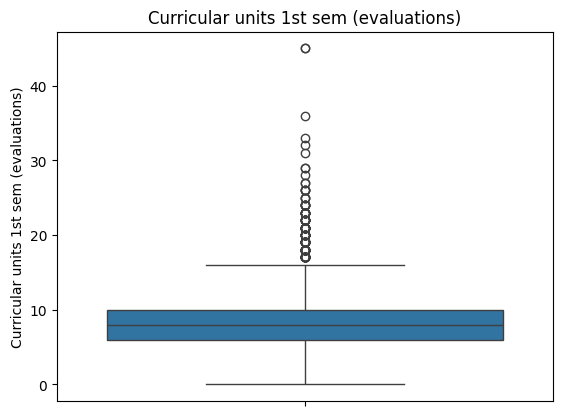

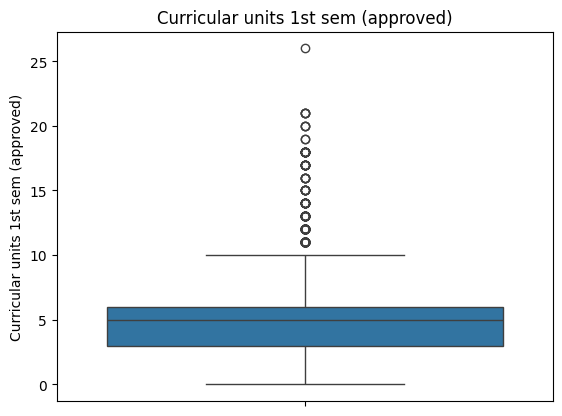

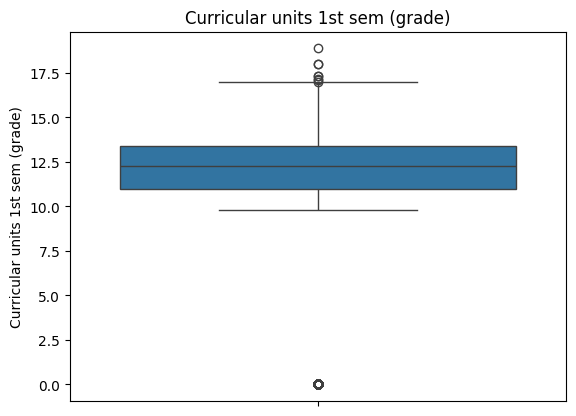

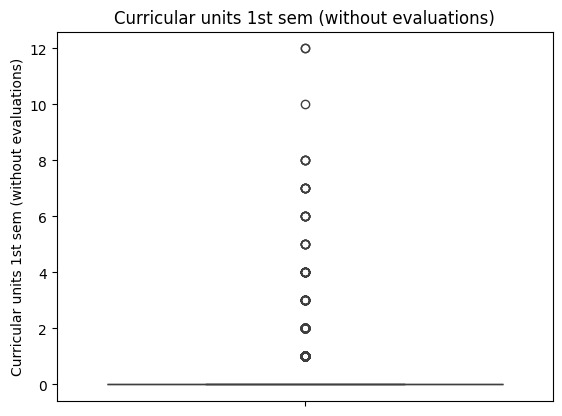

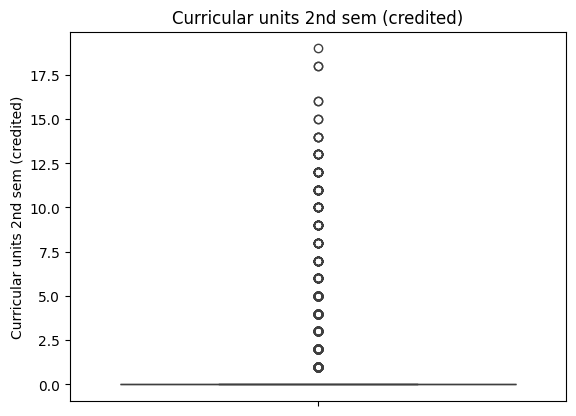

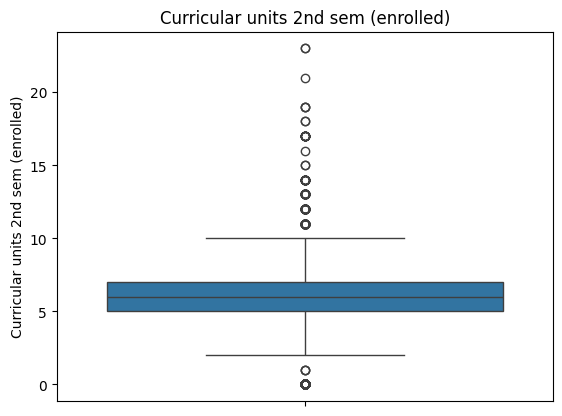

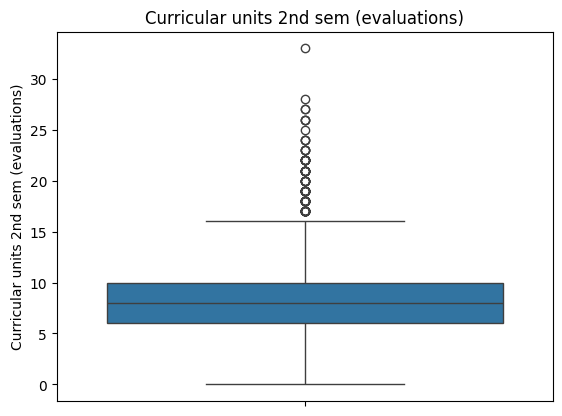

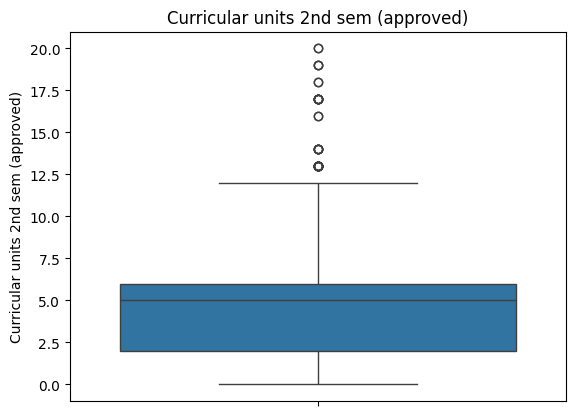

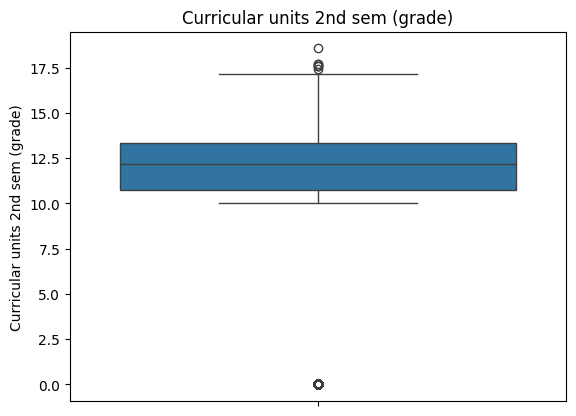

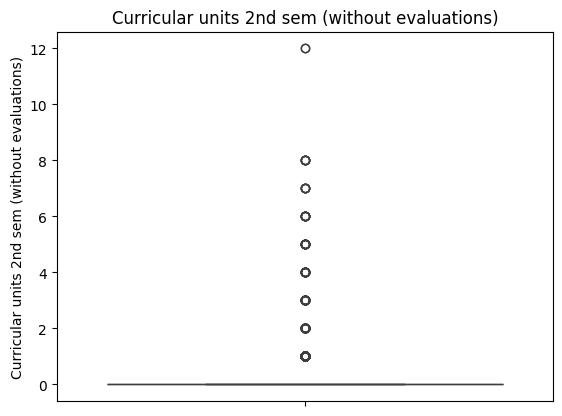

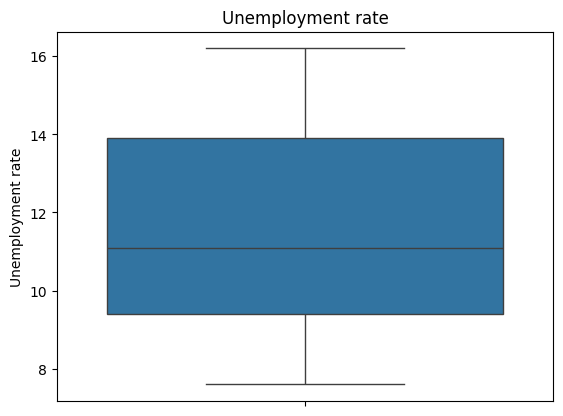

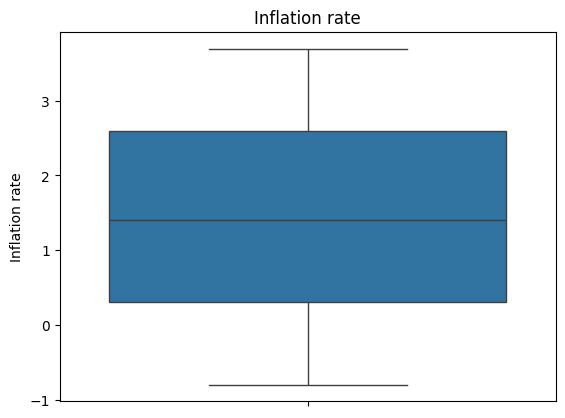

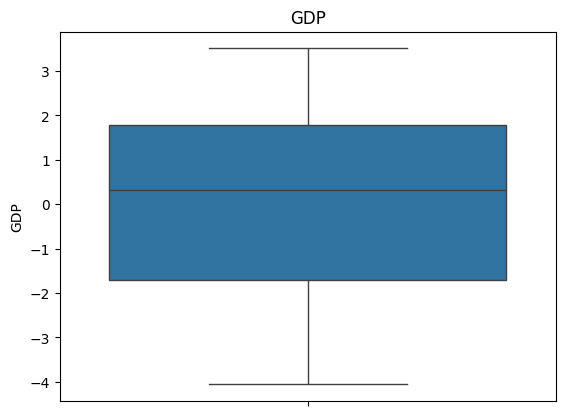

In [27]:
numerical_features = X.select_dtypes(include="number").columns
for i, column in enumerate(numerical_features):
    d.sns.boxplot(X[column])
    d.plt.title(column)
    d.plt.show()

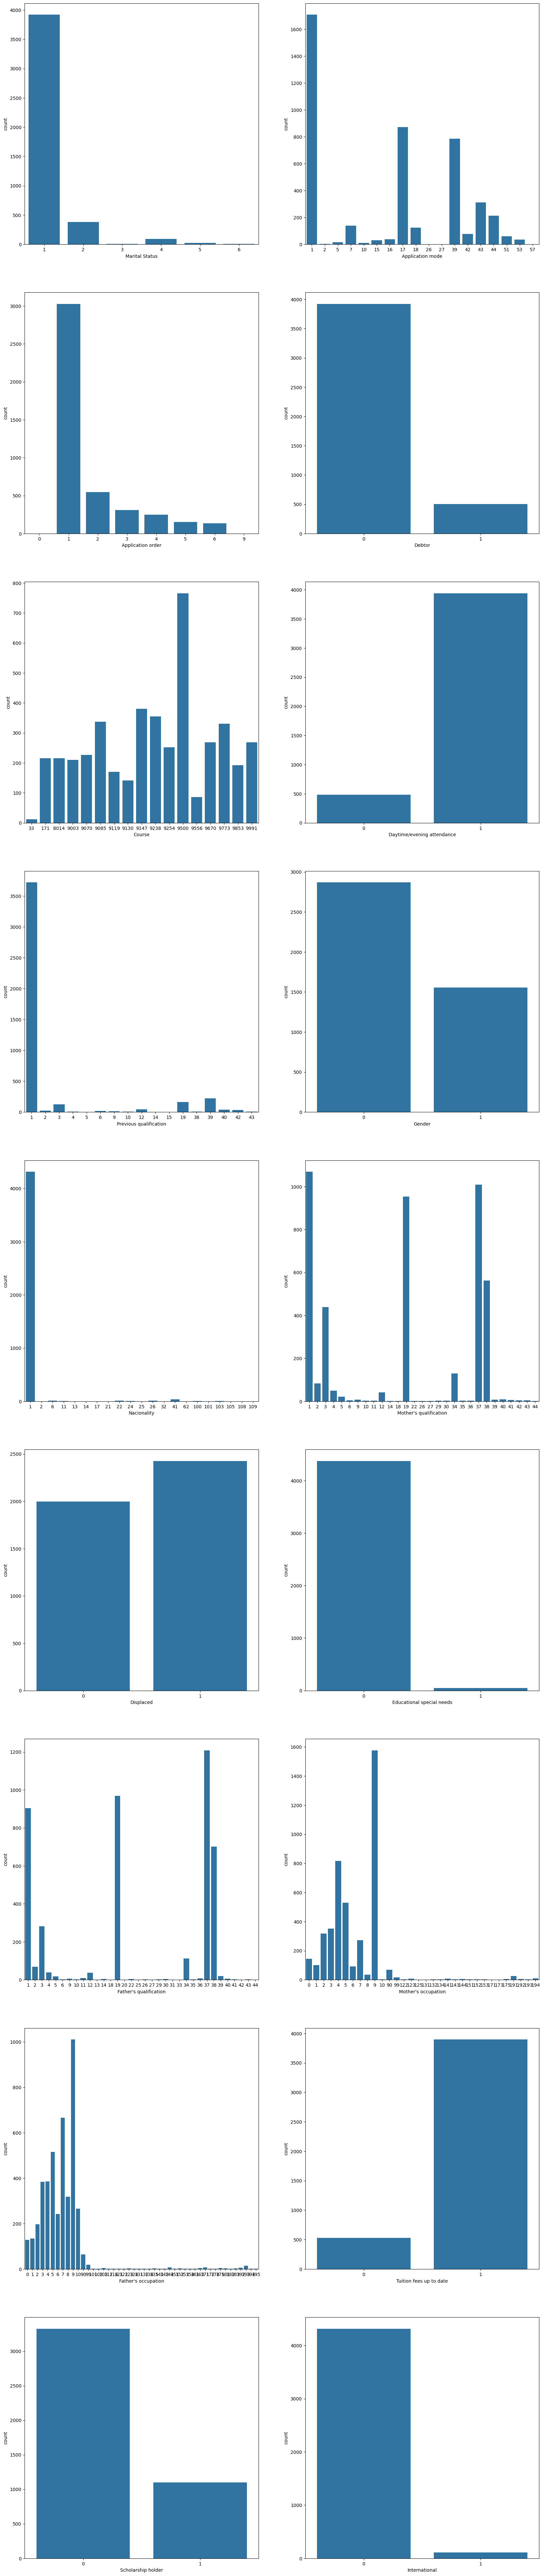

In [28]:
ncols=2
nrows=len(categorical_features)//ncols

fig,axes=d.plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,100))
axes=axes.ravel()

for i, col_name in enumerate(categorical_features):
        ax=axes[i]
        d.sns.countplot(data=X,x=col_name,ax=ax)

##### <span style="color:green; text-align:center;">I 2- Presentation of outcomes</span>

In [29]:
# dimension of target
y.shape

(4424, 1)

In [30]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  4424 non-null   object
dtypes: object(1)
memory usage: 34.7+ KB


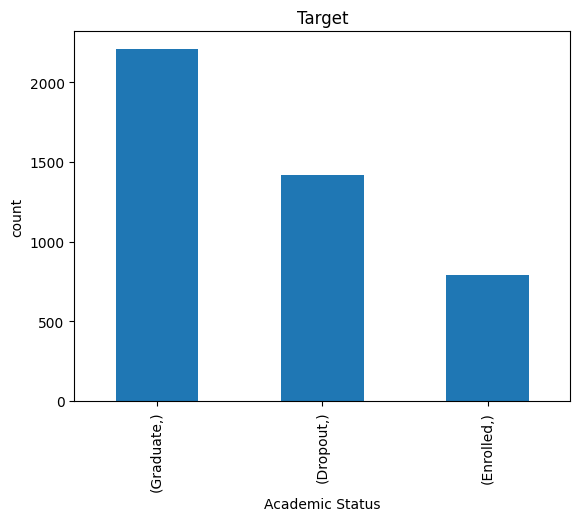

In [36]:
y.value_counts().plot(kind='bar')
d.plt.title('Target')
d.plt.xlabel('Academic Status')
_ = d.plt.ylabel('count')

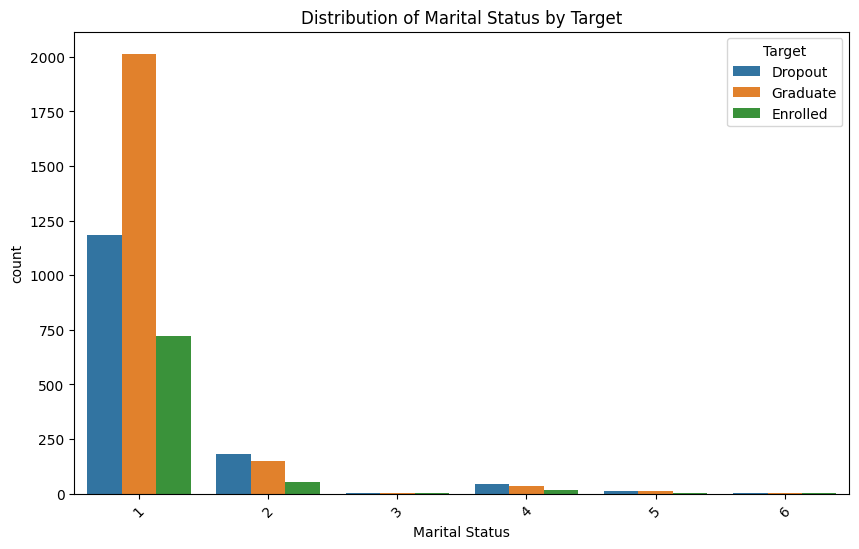

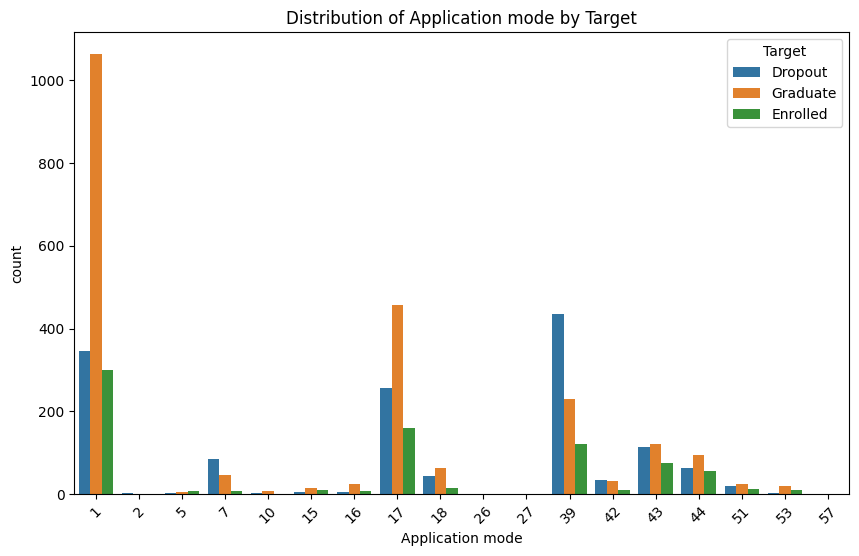

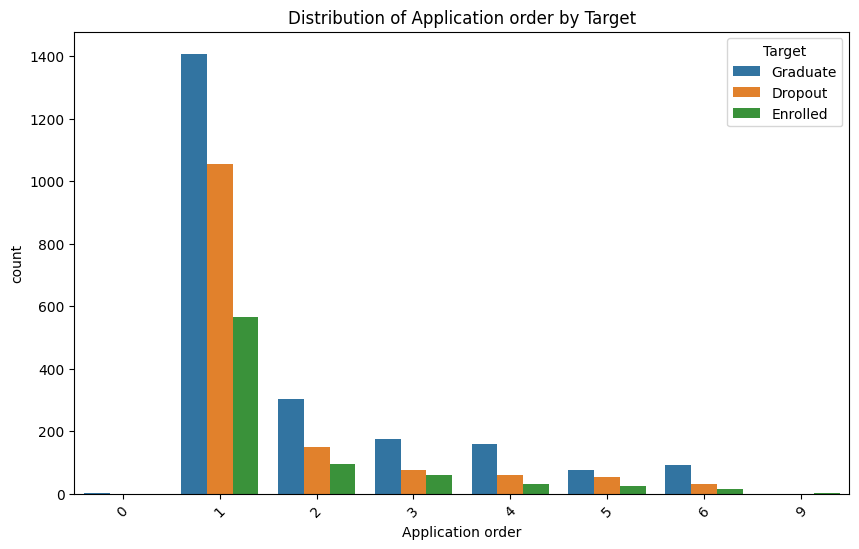

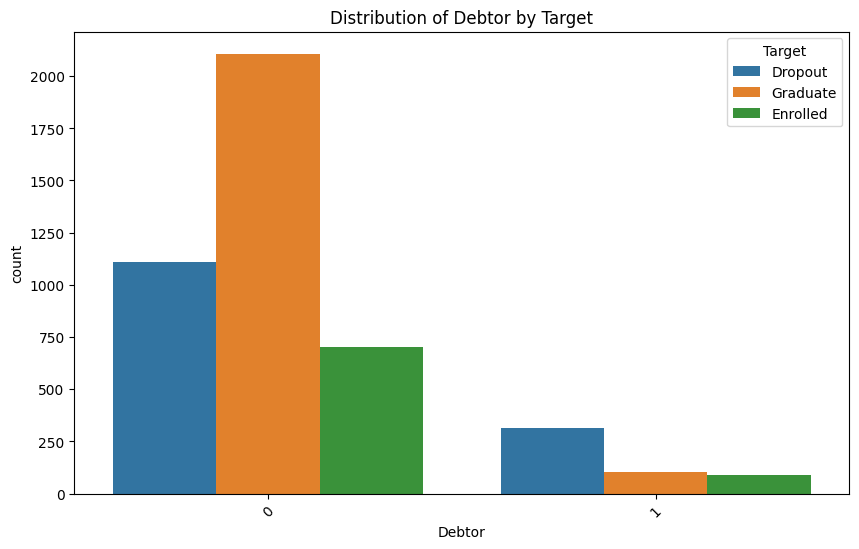

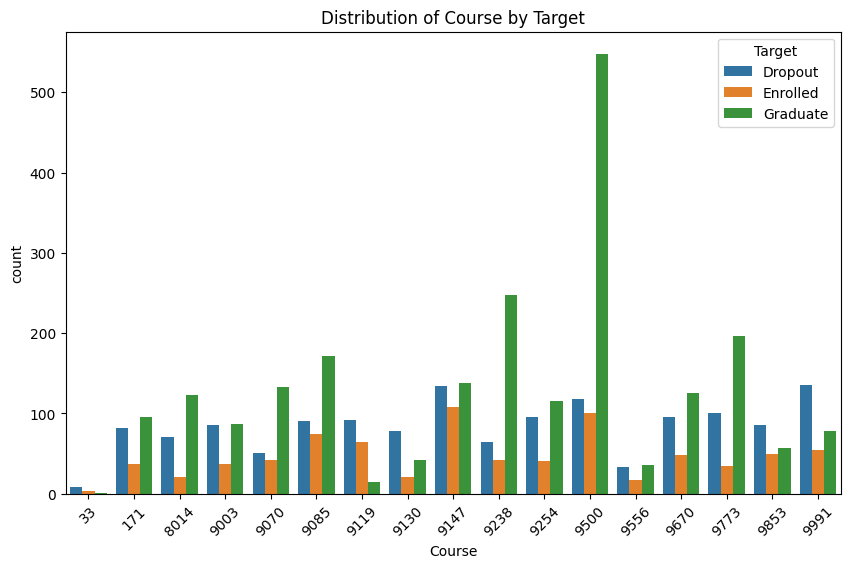

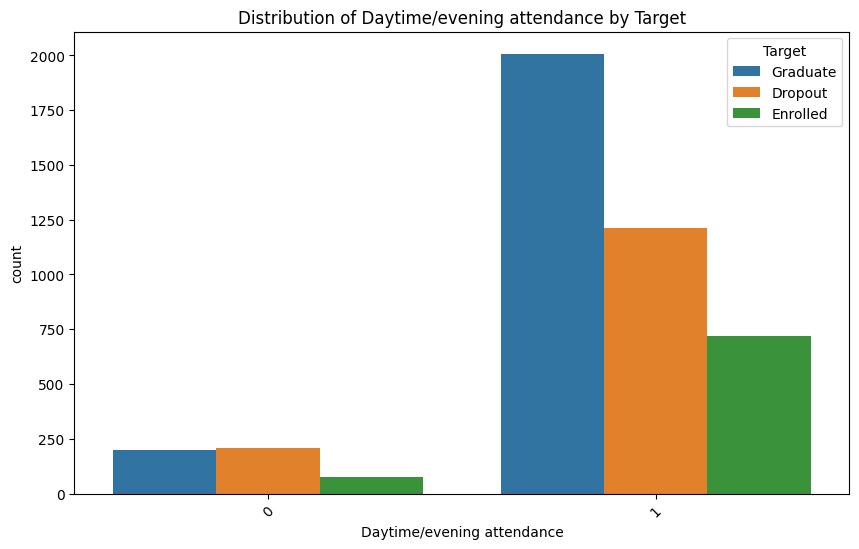

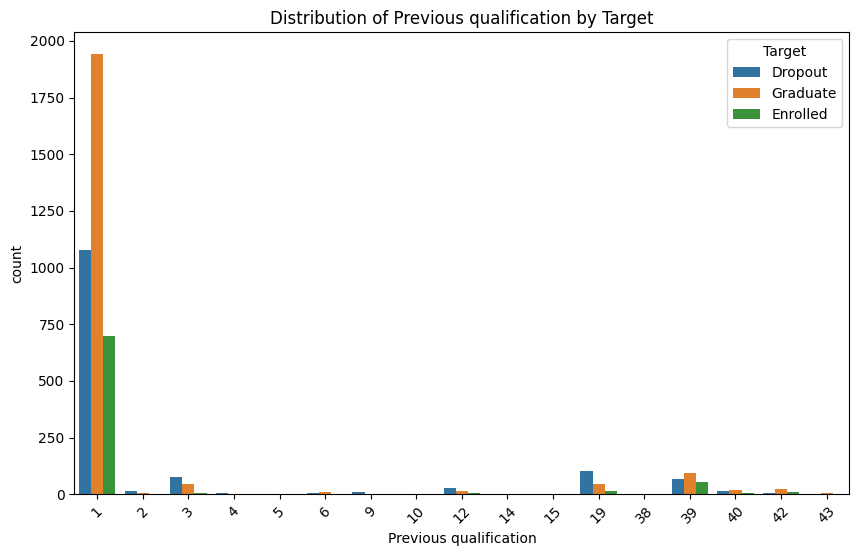

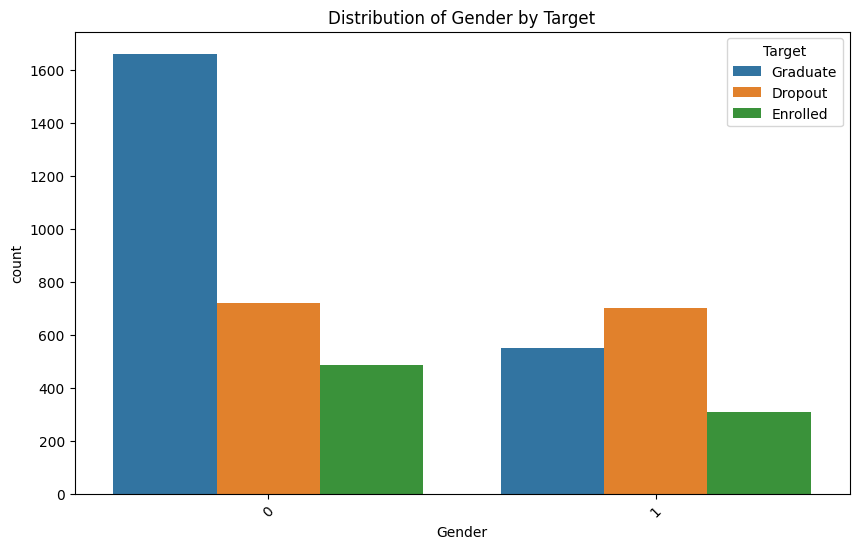

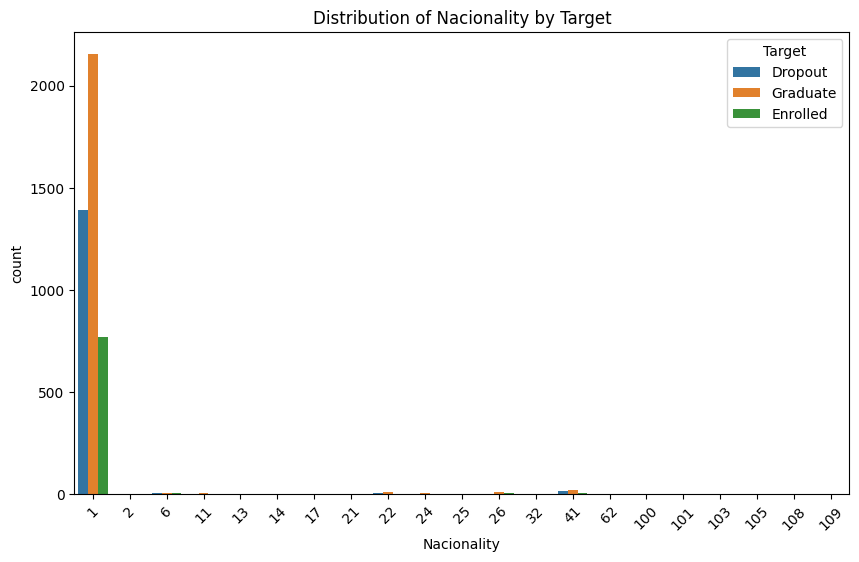

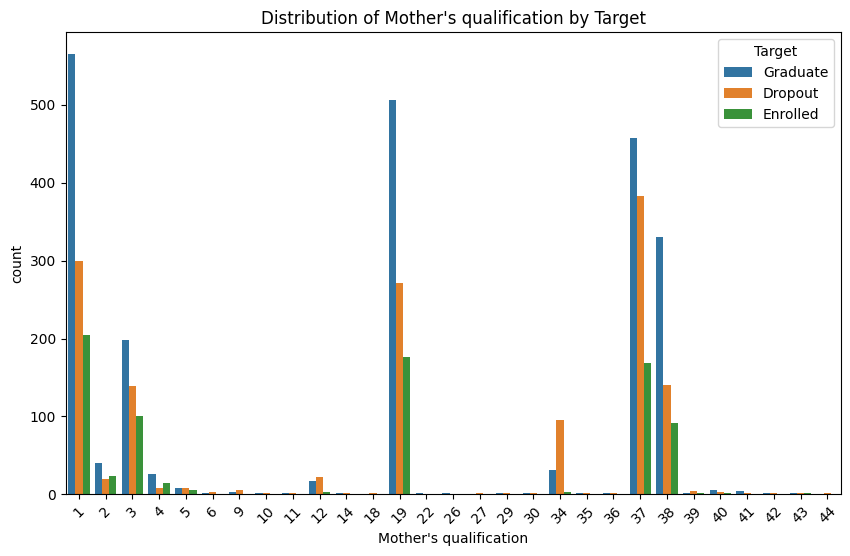

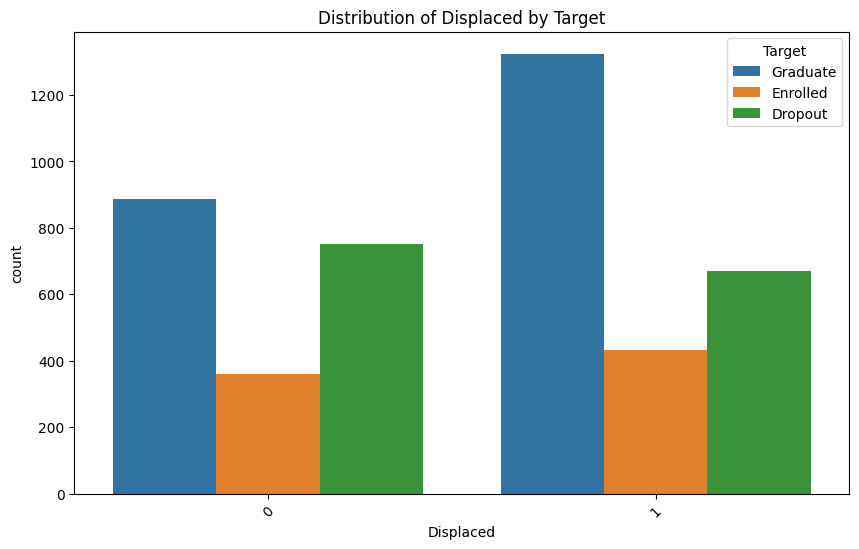

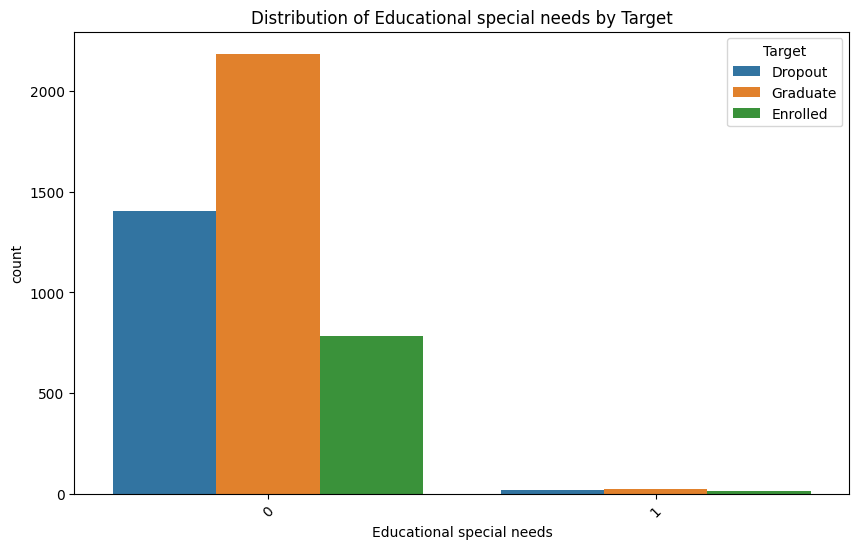

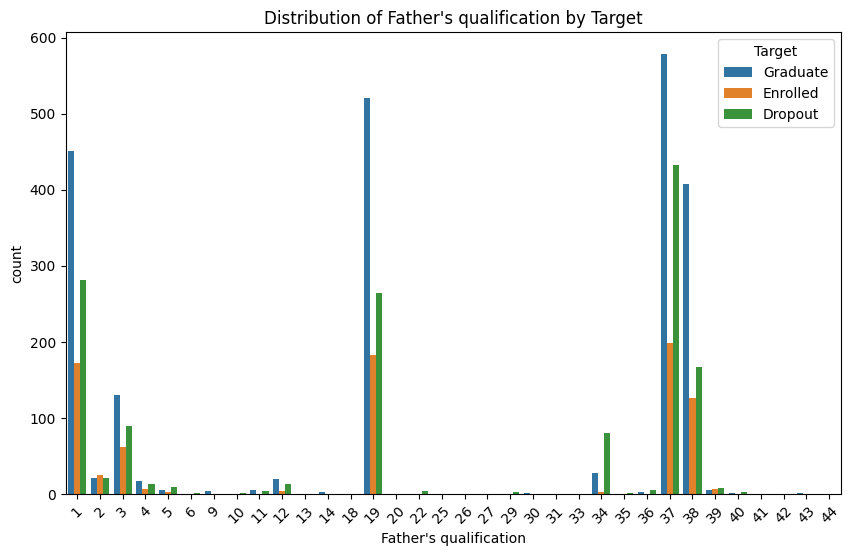

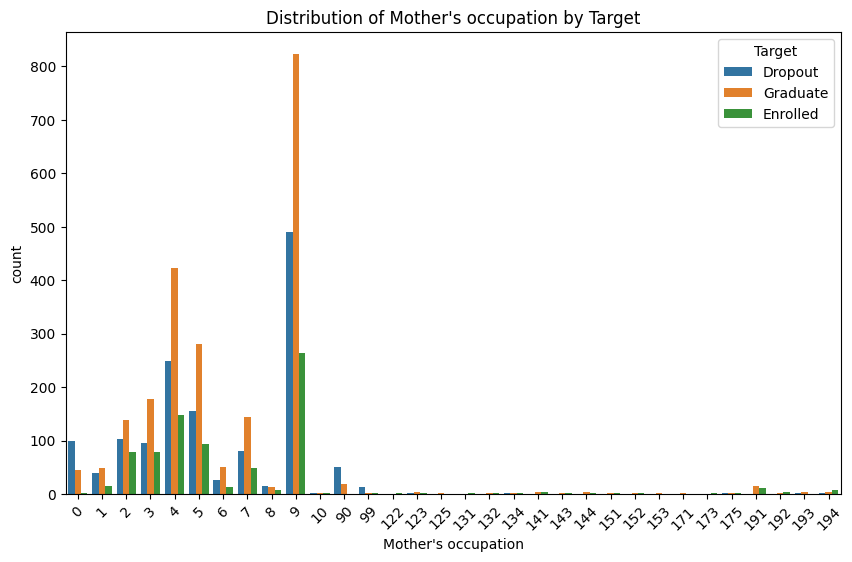

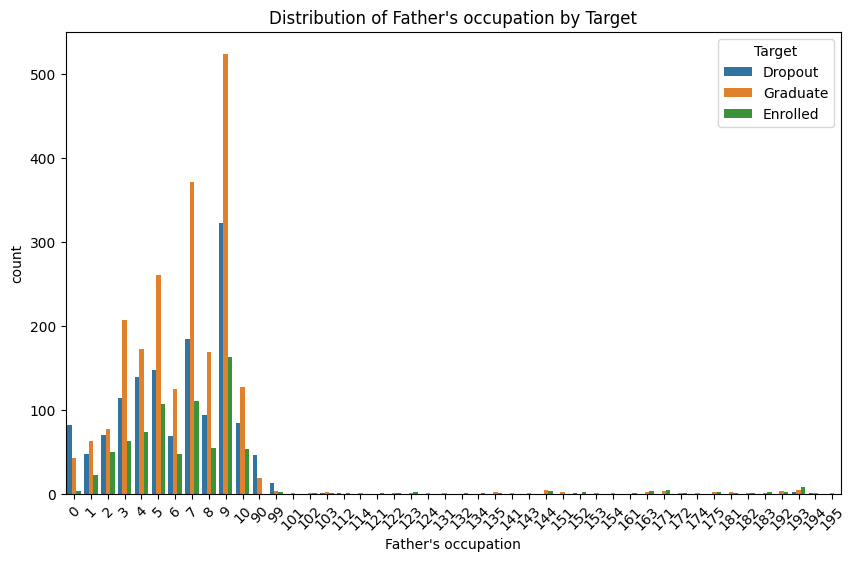

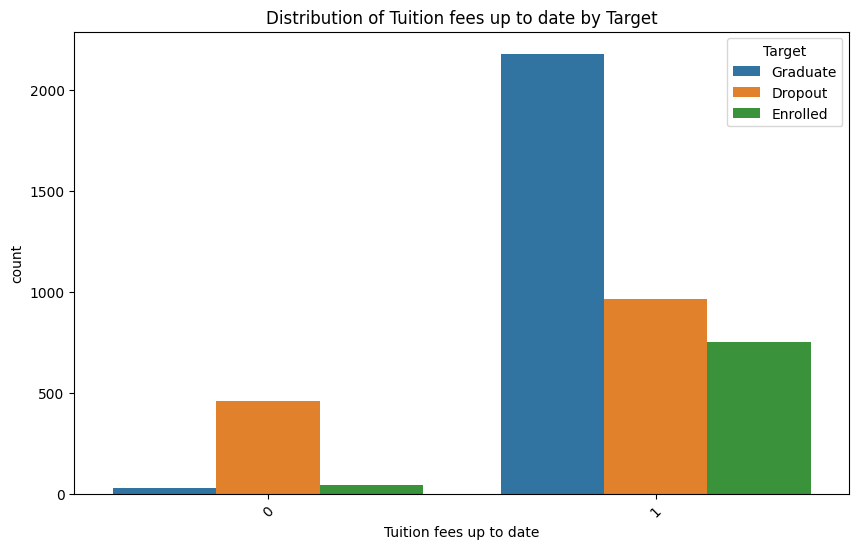

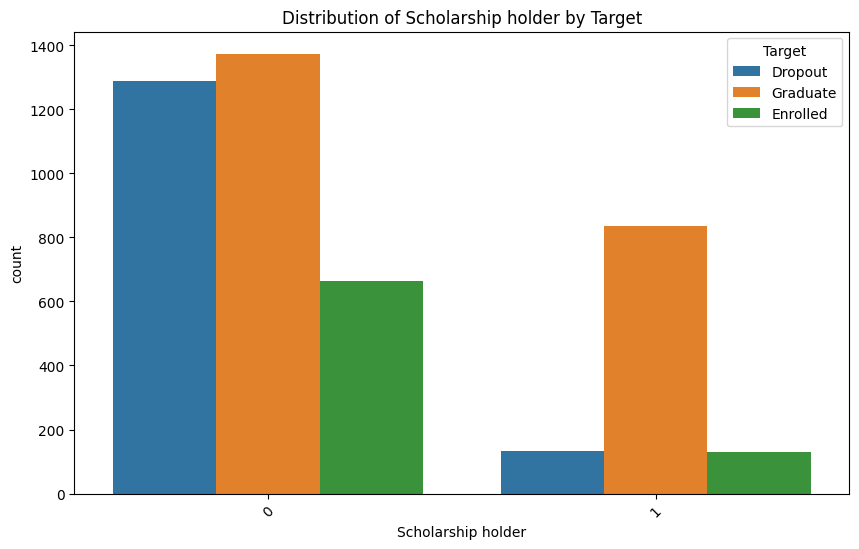

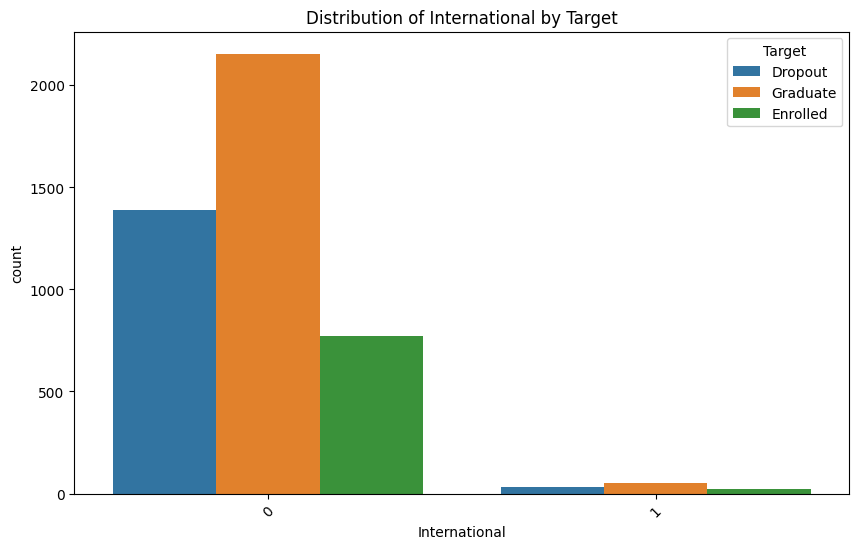

In [34]:


# bar plot for categorical features
for var in categorical_features:
    d.plt.figure(figsize=(10, 6))
    d.sns.countplot(data=df, x=var, hue='Target')
    d.plt.title(f'Distribution of {var} by Target')
    d.plt.xticks(rotation=45)
    d.plt.show()

Dropout rates seem to be highly associated with Previous Qualification Grade, Scholarship Holder status and Gender.
